Here we will build a connectivity analysis pipeline for the KPE study. 
Methods should be easily generalized for others studies. 


In [1]:
# Run connectivity analysis with ICA product instead of atlas (data driven method)
# basic method:
# 1. Extract ICA from all subject in first resting state. 
# 2. Mask and fit time series using this mask. 
# create connectomes and NBS
## Use this box if you want MDSL
from nilearn.decomposition import CanICA
canica = CanICA(n_components=20, smoothing_fwhm=6.,
                memory="/home/oad4/scratch60/nilearn", memory_level=2,
                threshold="auto", verbose=8, random_state=0)

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
import os
import numpy as np

In [3]:
# methods
def removeVars (confoundFile):
    # this method takes the csv regressors file (from fmriPrep) and chooses a few to confound. You can change those few
    import pandas as pd
    confound = pd.read_csv(confoundFile,sep="\t", na_values="n/a")
    finalConf = confound[['csf', 'white_matter', 'global_signal',
                          'a_comp_cor_00', 'a_comp_cor_01',	'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 
                        'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']]
 
    return finalConf

In [4]:
# build method for creating time series for subjects
def timeSeries(func_files, confound_files):
    total_subjects = [] # creating an empty array that will hold all subjects matrix 
    # This function needs a masker object that will be defined outside the function
    for func_file, confound_file in zip(func_files, confound_files):
        confoundClean = removeVars(confound_file)
        confoundArray = confoundClean.values
        time_series = masker.fit_transform(func_file, confounds=confoundArray)
        #time_series = extractor.fit_transform(func_file, confounds=confoundArray)
        #masker.fit_transform(func_file, confoundArray)
        total_subjects.append(time_series)
    return total_subjects

# contrasting two timePoints
def contFuncs(time_series1, time_series2):
    twoMinusOneMat = []
    for scanMatrix, scanMatrix2 in zip(time_series1, time_series2):
        a = scanMatrix2 - scanMatrix
        twoMinusOneMat.append(a)
    return np.array(twoMinusOneMat)

import numpy as np
from nilearn import plotting

# create correlation matrix per subject
def createCorMat(time_series):
    # create correlation matrix for each subject
    fullMatrix = []
    for time_s in time_series:
        correlation_matrix = correlation_measure.fit_transform([time_s])[0]
        fullMatrix.append(correlation_matrix)
    return fullMatrix

# create connecotme graph per subject
def connectome_graph (fullMatrix):
    # here it is set to threshold 1%
    for matrix in fullMatrix:
        plotting.plot_connectome(matrix, coords,
                             edge_threshold="99%", colorbar=True)
        plotting.show()

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
# Here you set the specific methods for masking and correlation. Please see Nilearn website for more info.

from nilearn.input_data import NiftiMapsMasker
from nilearn.input_data import NiftiLabelsMasker
# in this mask we standardize the values, so mean is 0 and between -1 to 1
masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True, smoothing_fwhm = 6,
                         memory="/home/oad4/scratch60/nilearn",high_pass=.01 , low_pass = .1, t_r=1, verbose=5)

# use different masker when using Yeo atlas. 
#masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,smoothing_fwhm = 6,
 #                        memory="/home/oad4/scratch60/nilearn",high_pass=.01 , low_pass = .1, t_r=1, verbose=5)
                           
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='partial correlation') # can choose partial - it might be better


In [6]:
# now we call subjcets
# and start the real analysis
subList =  ['008','1293','1307','1322','1339','1343','1387','1223']
midSubList = ['1253','1263','1351','1364','1369','1390','1403']

# these two functions take subject list and session number (in string) and return func file list and confound file list
def fileList(subjects, session):
    func_files = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-%s/func/sub-%s_ses-%s_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' % (sub,session,sub,session) for sub in subjects]
    return func_files

def confList(subjects, session):
    confound_files = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-%s/func/sub-%s_ses-%s_task-rest_desc-confounds_regressors.tsv' % (sub,session,sub,session) for sub in subjects]
    return confound_files


In [7]:
# now we call for the functions for each set.
# for every time line we want to run time series and then contrast between the times
ket1_series = timeSeries(func_files=fileList(subList,'1'), confound_files=confList(subList, '1'))

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/home/oad4/scratch60/nilearn'", use "location='/home/oad4/scratch60/nilearn'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)
/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:301: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.memory_level == 0 and self.memory.cachedir is not None:
/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:302: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is curre

________________________________________resample_img cache loaded - 0.4s, 0.0min
[Memory]1.1s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]12.1s, 0.2min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/oad4/scratch60/kpeOutput/fmriprep/sub-1307/ses-1/func/sub-1307_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': 0.01,
  'low_pass': 0.1,
  'maps_img': '/home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'smoothing_fwhm': 6,
  'standardize': True,
  't_r': 1,
  'target_affine': None,
  'target_shape': None}, confounds=array([[4.930121e+03, ..., 0.000000e+00],
       ...,
       [4.805745e+03, ..., 3.336500e-04]]), dtype=None, memory=Memory(location=/home/oad4/scratch60/nilearn/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from /home/oad4/scratch60/kpeOutput/fmriprep/sub-1307/ses-1/func/sub-1307_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-pr

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/input_data/nifti_maps_masker.py:326: UserWarning: Persisting input arguments took 1.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  verbose=self.verbose)


______________________________________________filter_and_extract - 88.0s, 1.5min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]122.4s, 2.0min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]133.6s, 2.2min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]144.9s, 2.4min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]156.2s, 2.6min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/oad4/scratch60/kpeOutput/fmriprep/sub-1223/ses-1/func/sub-1223_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': 0.01,
  'low_pass': 0.1,
  'maps_img': '/home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'smoothing_fwhm': 6,
  'standardize': True,
  't_r': 1,
  'target_affine': None,
  'target_shape': None}, confounds=array([[ 5.422168e+03, ...,  0.000000e+00],
       ...,
       [ 5.316874e+03, ..., -2.285370e-03]]), dtype=None, memory=Memory(location=/home/oad4/scratch60/nilearn/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from /home/oad4/scratch60/kpeOutput/fmriprep/sub-1223/ses-1/func/sub-1223_ses-1_task-rest_space-MNI152NLin2009cAsym_des

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/input_data/nifti_maps_masker.py:326: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  verbose=self.verbose)


In [8]:
ket2_series = timeSeries(func_files=fileList(subList,'2'), confound_files=confList(subList, '2'))

[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]262.2s, 4.4min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]273.7s, 4.6min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]285.4s, 4.8min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]295.7s, 4.9min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]306.9s, 5.1min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]318.5s, 5.3min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]329.8s, 5.5min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/oad4/scratch60/kpeOutput/fmriprep/sub-1223/ses-2/func/sub-1223_ses-2_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': 0.01,
  'low_pass': 0.1,
  'maps_img': '/home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'smoothing_fwhm': 6,
  'standardize': True,
  't_r': 1,
  'target_affine': None,
  'target_shape': None}, confounds=array([[ 5.002589e+03, ...,  6.647130e-04],
       ...,
       [ 4.918335e+03, ..., -1.886770e-03]]), dtype=None, memory=Memory(location=/home/oad4/scratch60/nilearn/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from /home/oad4/scratch60/kpeOutput/fmriprep/sub-1223/ses-2/func/sub-1223_ses-2_task-rest_space-MNI152NLin2009cAsym_des

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/input_data/nifti_maps_masker.py:326: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  verbose=self.verbose)


In [9]:
ket3_series = timeSeries(func_files=fileList(subList,'3'), confound_files=confList(subList, '3'))

[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]437.2s, 7.3min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]448.5s, 7.5min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]460.0s, 7.7min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]470.3s, 7.8min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]481.0s, 8.0min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]492.6s, 8.2min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]504.4s, 8.4min  : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/oad4/scratch60/kpeOutput/fmriprep/sub-1223/ses-3/func/sub-1223_ses-3_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': 0.01,
  'low_pass': 0.1,
  'maps_img': '/home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'smoothing_fwhm': 6,
  'standardize': True,
  't_r': 1,
  'target_affine': None,
  'target_shape': None}, confounds=array([[ 5.33185e+03, ..., -8.05452e-05],
       ...,
       [ 5.18318e+03, ..., -1.81588e-03]]), dtype=None, memory=Memory(location=/home/oad4/scratch60/nilearn/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from /home/oad4/scratch60/kpeOutput/fmriprep/sub-1223/ses-3/func/sub-1223_ses-3_task-rest_space-MNI152NLin2009cAsym_desc-pr

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/input_data/nifti_maps_masker.py:326: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  verbose=self.verbose)


In [10]:
# build correlation matrix for each time point
ket1_corr = createCorMat(time_series=ket1_series)
ket2_corr = createCorMat(ket2_series)
ket3_corr = createCorMat(ket3_series)

In [11]:
# start contrasting
ket2_ket1 = contFuncs(ket1_corr, ket2_corr)
ket3_ket1 = contFuncs(ket1_corr, ket3_corr)
#ket3_ket1 = np.average(ket3_corr, axis=0) - np.average(ket1_corr, axis = 0) # we do so because the number do not match

ket3_ket1.shape


(8, 39, 39)

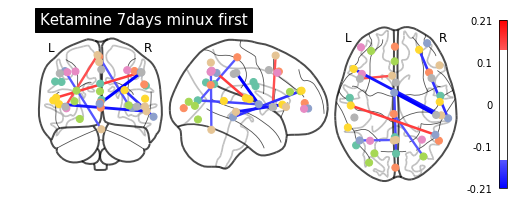

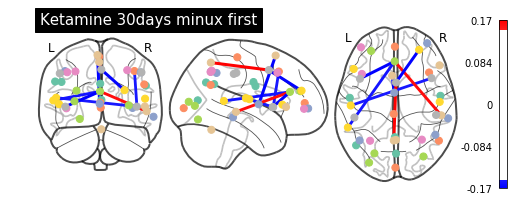

In [12]:
plotting.plot_connectome(np.average(ket2_ket1, axis=0), coords,
                         edge_threshold="99%", colorbar=True, title = "Ketamine 7days minux first")

plotting.plot_connectome(np.average(ket3_ket1, axis=0), coords,
                         edge_threshold="99%", colorbar=True, title = "Ketamine 30days minux first")



In [13]:
# let do midazolam
mid1_series = timeSeries(func_files=fileList(midSubList,'1'), confound_files=confList(midSubList, '1'))

mid2_series = timeSeries(func_files=fileList(midSubList,'2'), confound_files=confList(midSubList, '2'))

[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]614.1s, 10.2min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]625.2s, 10.4min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]636.7s, 10.6min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]647.9s, 10.8min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]659.0s, 11.0min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]670.5s, 11.2min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]681.3s, 11.4min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]692.0s, 11.5min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]703.3s, 11.7min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]714.8s, 11.9min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]726.0s, 12.1min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]737.0s, 12.3min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]748.4s, 12.5min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]759.2s, 12.7min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


In [14]:
mid3_no1253 = midSubList
print(mid3_no1253)
mid3_no1253.remove('1253')
mid3_series = timeSeries(fileList(mid3_no1253,'3'), confList(mid3_no1253,'3'))

['1253', '1263', '1351', '1364', '1369', '1390', '1403']
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]770.4s, 12.8min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]782.1s, 13.0min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]793.4s, 13.2min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]804.6s, 13.4min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]816.4s, 13.6min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/oad4/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]827.5s, 13.8min : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


In [42]:
# build correlation matrix for each time point
mid1_corr = createCorMat(time_series=mid1_series)
mid2_corr = createCorMat(mid2_series)
mid3_corr = createCorMat(mid3_series)

In [16]:
# start contrasting
mid2_mid1 = contFuncs(mid1_corr, mid2_corr)
#ket3_ket1 = contFuncs(ket1_corr, ket3_corr)
#mid3_mid1 = np.average(mid3_corr, axis=0) - np.average(mid1_corr, axis = 0) # we do so because the number do not match

#mid3_mid1.shape


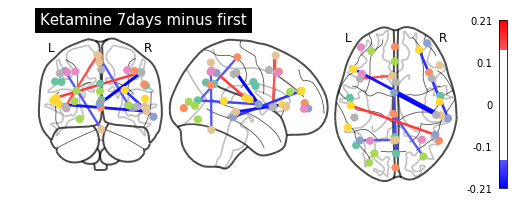

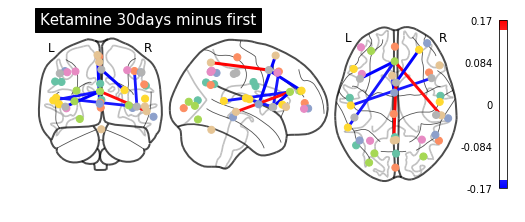

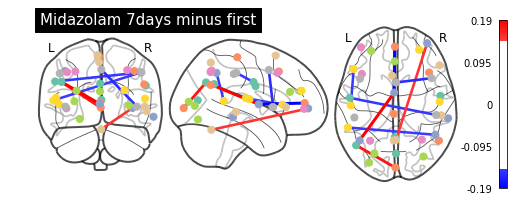

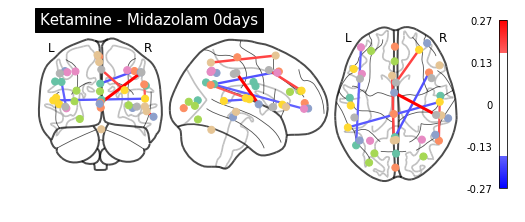

In [17]:
plotting.plot_connectome(np.average(ket2_ket1, axis=0), coords,
                         edge_threshold="99%", colorbar=True, title = "Ketamine 7days minus first")

plotting.plot_connectome(np.average(ket3_ket1, axis=0), coords,
                         edge_threshold="99%", colorbar=True, title = "Ketamine 30days minus first")

plotting.plot_connectome(np.average(mid2_mid1, axis=0), coords,
                         edge_threshold="99%", colorbar=True, title = "Midazolam 7days minus first")

#plotting.plot_connectome(mid3_mid1, coords,
 #                        edge_threshold="99%", colorbar=True, title = "midazolam 30days minux first")

plotting.plot_connectome(np.average(ket1_corr,axis=0) -np.average(mid1_corr, axis=0), coords,
                         edge_threshold="99%", colorbar=True, title = "Ketamine - Midazolam 0days")

plotting.plot_connectome(np.average(ket2_corr,axis=0)-np.average(mid2_corr,axis=0), coords,
                         edge_threshold="99%", colorbar=True, title = "Ketamine-Midazolan 7days", output_file='pretty_brain.png')





In [60]:
# rearrange the array to N,N,subnumber for NBS
ket1Reshape = np.moveaxis(np.array(ket1_corr), 0,-1)
print(ket1Reshape[:,:,:7].shape)
ket2Reshape = np.moveaxis(np.array(ket2_corr), 0,-1)
ket3Reshape = np.moveaxis(np.array(ket3_corr), 0,-1)
mid1Reshape = np.moveaxis(np.array(mid1_corr),0,-1)
mid2Reshape = np.moveaxis(np.array(mid2_corr),0,-1)
mid3Reshape = np.moveaxis(np.array(mid3_corr),0,-1)

print(mid1Reshape.shape)


(39, 39, 7)
(39, 39, 7)


In [ ]:
# now we can run NBS
from bct import nbs
# NBS is taken from: https://github.com/aestrivex/bctpy, can be installed using pip (pip install bctpy)
checkNBS_p,_,_ = nbs.nbs_bct(ket1Reshape, ket2Reshape, thresh=3, tail='both',k=1000, paired=True, verbose = True)

In [ ]:
checkNBS_p

In [73]:
from bct import nbs
pval, adj, _ = nbs.nbs_bct(ket1Reshape, ket3Reshape, thresh=2.5, tail='both',k=1000, paired=True, verbose = True)
# check mean p vlue
#np.mean(checkNBS[0])

max component size is 11
estimating null distribution with 1000 permutations
permutation 0 of 1000.  Permutation max is 20.0.  Observed max is 11.0.  P-val estimate is 1.000
permutation 1 of 1000.  Permutation max is 34.0.  Observed max is 11.0.  P-val estimate is 1.000
permutation 2 of 1000.  Permutation max is 23.0.  Observed max is 11.0.  P-val estimate is 1.000
permutation 3 of 1000.  Permutation max is 21.0.  Observed max is 11.0.  P-val estimate is 1.000
permutation 4 of 1000.  Permutation max is 15.0.  Observed max is 11.0.  P-val estimate is 1.000
permutation 5 of 1000.  Permutation max is 26.0.  Observed max is 11.0.  P-val estimate is 1.000
permutation 6 of 1000.  Permutation max is 29.0.  Observed max is 11.0.  P-val estimate is 1.000
permutation 7 of 1000.  Permutation max is 24.0.  Observed max is 11.0.  P-val estimate is 1.000
permutation 8 of 1000.  Permutation max is 31.0.  Observed max is 11.0.  P-val estimate is 1.000
permutation 9 of 1000.  Permutation max is 31.0.  

permutation 90 of 1000.  Permutation max is 30.0.  Observed max is 11.0.  P-val estimate is 0.956
permutation 91 of 1000.  Permutation max is 13.0.  Observed max is 11.0.  P-val estimate is 0.957
permutation 92 of 1000.  Permutation max is 7.0.  Observed max is 11.0.  P-val estimate is 0.946
permutation 93 of 1000.  Permutation max is 26.0.  Observed max is 11.0.  P-val estimate is 0.947
permutation 94 of 1000.  Permutation max is 20.0.  Observed max is 11.0.  P-val estimate is 0.947
permutation 95 of 1000.  Permutation max is 14.0.  Observed max is 11.0.  P-val estimate is 0.948
permutation 96 of 1000.  Permutation max is 30.0.  Observed max is 11.0.  P-val estimate is 0.948
permutation 97 of 1000.  Permutation max is 12.0.  Observed max is 11.0.  P-val estimate is 0.949
permutation 98 of 1000.  Permutation max is 17.0.  Observed max is 11.0.  P-val estimate is 0.949
permutation 99 of 1000.  Permutation max is 32.0.  Observed max is 11.0.  P-val estimate is 0.950
permutation 100 of 10

permutation 180 of 1000.  Permutation max is 31.0.  Observed max is 11.0.  P-val estimate is 0.950
permutation 181 of 1000.  Permutation max is 31.0.  Observed max is 11.0.  P-val estimate is 0.951
permutation 182 of 1000.  Permutation max is 17.0.  Observed max is 11.0.  P-val estimate is 0.951
permutation 183 of 1000.  Permutation max is 16.0.  Observed max is 11.0.  P-val estimate is 0.951
permutation 184 of 1000.  Permutation max is 16.0.  Observed max is 11.0.  P-val estimate is 0.951
permutation 185 of 1000.  Permutation max is 35.0.  Observed max is 11.0.  P-val estimate is 0.952
permutation 186 of 1000.  Permutation max is 13.0.  Observed max is 11.0.  P-val estimate is 0.952
permutation 187 of 1000.  Permutation max is 34.0.  Observed max is 11.0.  P-val estimate is 0.952
permutation 188 of 1000.  Permutation max is 22.0.  Observed max is 11.0.  P-val estimate is 0.952
permutation 189 of 1000.  Permutation max is 38.0.  Observed max is 11.0.  P-val estimate is 0.953
permutatio

permutation 270 of 1000.  Permutation max is 25.0.  Observed max is 11.0.  P-val estimate is 0.948
permutation 271 of 1000.  Permutation max is 7.0.  Observed max is 11.0.  P-val estimate is 0.945
permutation 272 of 1000.  Permutation max is 28.0.  Observed max is 11.0.  P-val estimate is 0.945
permutation 273 of 1000.  Permutation max is 22.0.  Observed max is 11.0.  P-val estimate is 0.945
permutation 274 of 1000.  Permutation max is 10.0.  Observed max is 11.0.  P-val estimate is 0.942
permutation 275 of 1000.  Permutation max is 26.0.  Observed max is 11.0.  P-val estimate is 0.942
permutation 276 of 1000.  Permutation max is 28.0.  Observed max is 11.0.  P-val estimate is 0.942
permutation 277 of 1000.  Permutation max is 28.0.  Observed max is 11.0.  P-val estimate is 0.942
permutation 278 of 1000.  Permutation max is 10.0.  Observed max is 11.0.  P-val estimate is 0.939
permutation 279 of 1000.  Permutation max is 17.0.  Observed max is 11.0.  P-val estimate is 0.939
permutation

permutation 361 of 1000.  Permutation max is 10.0.  Observed max is 11.0.  P-val estimate is 0.934
permutation 362 of 1000.  Permutation max is 17.0.  Observed max is 11.0.  P-val estimate is 0.934
permutation 363 of 1000.  Permutation max is 34.0.  Observed max is 11.0.  P-val estimate is 0.934
permutation 364 of 1000.  Permutation max is 28.0.  Observed max is 11.0.  P-val estimate is 0.934
permutation 365 of 1000.  Permutation max is 31.0.  Observed max is 11.0.  P-val estimate is 0.934
permutation 366 of 1000.  Permutation max is 24.0.  Observed max is 11.0.  P-val estimate is 0.935
permutation 367 of 1000.  Permutation max is 37.0.  Observed max is 11.0.  P-val estimate is 0.935
permutation 368 of 1000.  Permutation max is 15.0.  Observed max is 11.0.  P-val estimate is 0.935
permutation 369 of 1000.  Permutation max is 22.0.  Observed max is 11.0.  P-val estimate is 0.935
permutation 370 of 1000.  Permutation max is 10.0.  Observed max is 11.0.  P-val estimate is 0.933
permutatio

permutation 451 of 1000.  Permutation max is 21.0.  Observed max is 11.0.  P-val estimate is 0.931
permutation 452 of 1000.  Permutation max is 25.0.  Observed max is 11.0.  P-val estimate is 0.932
permutation 453 of 1000.  Permutation max is 7.0.  Observed max is 11.0.  P-val estimate is 0.930
permutation 454 of 1000.  Permutation max is 35.0.  Observed max is 11.0.  P-val estimate is 0.930
permutation 455 of 1000.  Permutation max is 30.0.  Observed max is 11.0.  P-val estimate is 0.930
permutation 456 of 1000.  Permutation max is 28.0.  Observed max is 11.0.  P-val estimate is 0.930
permutation 457 of 1000.  Permutation max is 22.0.  Observed max is 11.0.  P-val estimate is 0.930
permutation 458 of 1000.  Permutation max is 31.0.  Observed max is 11.0.  P-val estimate is 0.930
permutation 459 of 1000.  Permutation max is 20.0.  Observed max is 11.0.  P-val estimate is 0.930
permutation 460 of 1000.  Permutation max is 13.0.  Observed max is 11.0.  P-val estimate is 0.931
permutation

permutation 541 of 1000.  Permutation max is 35.0.  Observed max is 11.0.  P-val estimate is 0.928
permutation 542 of 1000.  Permutation max is 30.0.  Observed max is 11.0.  P-val estimate is 0.928
permutation 543 of 1000.  Permutation max is 32.0.  Observed max is 11.0.  P-val estimate is 0.928
permutation 544 of 1000.  Permutation max is 10.0.  Observed max is 11.0.  P-val estimate is 0.927
permutation 545 of 1000.  Permutation max is 15.0.  Observed max is 11.0.  P-val estimate is 0.927
permutation 546 of 1000.  Permutation max is 17.0.  Observed max is 11.0.  P-val estimate is 0.927
permutation 547 of 1000.  Permutation max is 38.0.  Observed max is 11.0.  P-val estimate is 0.927
permutation 548 of 1000.  Permutation max is 30.0.  Observed max is 11.0.  P-val estimate is 0.927
permutation 549 of 1000.  Permutation max is 38.0.  Observed max is 11.0.  P-val estimate is 0.927
permutation 550 of 1000.  Permutation max is 27.0.  Observed max is 11.0.  P-val estimate is 0.927
permutatio

permutation 631 of 1000.  Permutation max is 15.0.  Observed max is 11.0.  P-val estimate is 0.927
permutation 632 of 1000.  Permutation max is 15.0.  Observed max is 11.0.  P-val estimate is 0.927
permutation 633 of 1000.  Permutation max is 20.0.  Observed max is 11.0.  P-val estimate is 0.927
permutation 634 of 1000.  Permutation max is 29.0.  Observed max is 11.0.  P-val estimate is 0.928
permutation 635 of 1000.  Permutation max is 17.0.  Observed max is 11.0.  P-val estimate is 0.928
permutation 636 of 1000.  Permutation max is 28.0.  Observed max is 11.0.  P-val estimate is 0.928
permutation 637 of 1000.  Permutation max is 23.0.  Observed max is 11.0.  P-val estimate is 0.928
permutation 638 of 1000.  Permutation max is 24.0.  Observed max is 11.0.  P-val estimate is 0.928
permutation 639 of 1000.  Permutation max is 24.0.  Observed max is 11.0.  P-val estimate is 0.928
permutation 640 of 1000.  Permutation max is 34.0.  Observed max is 11.0.  P-val estimate is 0.928
permutatio

permutation 714 of 1000.  Permutation max is 16.0.  Observed max is 11.0.  P-val estimate is 0.933
permutation 715 of 1000.  Permutation max is 31.0.  Observed max is 11.0.  P-val estimate is 0.933
permutation 716 of 1000.  Permutation max is 24.0.  Observed max is 11.0.  P-val estimate is 0.933
permutation 717 of 1000.  Permutation max is 23.0.  Observed max is 11.0.  P-val estimate is 0.933
permutation 718 of 1000.  Permutation max is 33.0.  Observed max is 11.0.  P-val estimate is 0.933
permutation 719 of 1000.  Permutation max is 16.0.  Observed max is 11.0.  P-val estimate is 0.933
permutation 720 of 1000.  Permutation max is 28.0.  Observed max is 11.0.  P-val estimate is 0.933
permutation 721 of 1000.  Permutation max is 7.0.  Observed max is 11.0.  P-val estimate is 0.932
permutation 722 of 1000.  Permutation max is 31.0.  Observed max is 11.0.  P-val estimate is 0.932
permutation 723 of 1000.  Permutation max is 26.0.  Observed max is 11.0.  P-val estimate is 0.932
permutation

permutation 801 of 1000.  Permutation max is 20.0.  Observed max is 11.0.  P-val estimate is 0.933
permutation 802 of 1000.  Permutation max is 43.0.  Observed max is 11.0.  P-val estimate is 0.933
permutation 803 of 1000.  Permutation max is 26.0.  Observed max is 11.0.  P-val estimate is 0.933
permutation 804 of 1000.  Permutation max is 7.0.  Observed max is 11.0.  P-val estimate is 0.932
permutation 805 of 1000.  Permutation max is 16.0.  Observed max is 11.0.  P-val estimate is 0.932
permutation 806 of 1000.  Permutation max is 14.0.  Observed max is 11.0.  P-val estimate is 0.932
permutation 807 of 1000.  Permutation max is 29.0.  Observed max is 11.0.  P-val estimate is 0.932
permutation 808 of 1000.  Permutation max is 35.0.  Observed max is 11.0.  P-val estimate is 0.932
permutation 809 of 1000.  Permutation max is 26.0.  Observed max is 11.0.  P-val estimate is 0.932
permutation 810 of 1000.  Permutation max is 21.0.  Observed max is 11.0.  P-val estimate is 0.932
permutation

permutation 889 of 1000.  Permutation max is 31.0.  Observed max is 11.0.  P-val estimate is 0.930
permutation 890 of 1000.  Permutation max is 17.0.  Observed max is 11.0.  P-val estimate is 0.930
permutation 891 of 1000.  Permutation max is 21.0.  Observed max is 11.0.  P-val estimate is 0.930
permutation 892 of 1000.  Permutation max is 27.0.  Observed max is 11.0.  P-val estimate is 0.931
permutation 893 of 1000.  Permutation max is 16.0.  Observed max is 11.0.  P-val estimate is 0.931
permutation 894 of 1000.  Permutation max is 28.0.  Observed max is 11.0.  P-val estimate is 0.931
permutation 895 of 1000.  Permutation max is 26.0.  Observed max is 11.0.  P-val estimate is 0.931
permutation 896 of 1000.  Permutation max is 38.0.  Observed max is 11.0.  P-val estimate is 0.931
permutation 897 of 1000.  Permutation max is 29.0.  Observed max is 11.0.  P-val estimate is 0.931
permutation 898 of 1000.  Permutation max is 30.0.  Observed max is 11.0.  P-val estimate is 0.931
permutatio

permutation 980 of 1000.  Permutation max is 38.0.  Observed max is 11.0.  P-val estimate is 0.929
permutation 981 of 1000.  Permutation max is 30.0.  Observed max is 11.0.  P-val estimate is 0.929
permutation 982 of 1000.  Permutation max is 38.0.  Observed max is 11.0.  P-val estimate is 0.929
permutation 983 of 1000.  Permutation max is 18.0.  Observed max is 11.0.  P-val estimate is 0.929
permutation 984 of 1000.  Permutation max is 39.0.  Observed max is 11.0.  P-val estimate is 0.929
permutation 985 of 1000.  Permutation max is 29.0.  Observed max is 11.0.  P-val estimate is 0.929
permutation 986 of 1000.  Permutation max is 24.0.  Observed max is 11.0.  P-val estimate is 0.929
permutation 987 of 1000.  Permutation max is 38.0.  Observed max is 11.0.  P-val estimate is 0.929
permutation 988 of 1000.  Permutation max is 33.0.  Observed max is 11.0.  P-val estimate is 0.929
permutation 989 of 1000.  Permutation max is 24.0.  Observed max is 11.0.  P-val estimate is 0.929
permutatio

In [74]:
print(pval.shape)
print (pval)
len(pval)


(6,)
[1.    1.    1.    1.    1.    0.928]


6

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


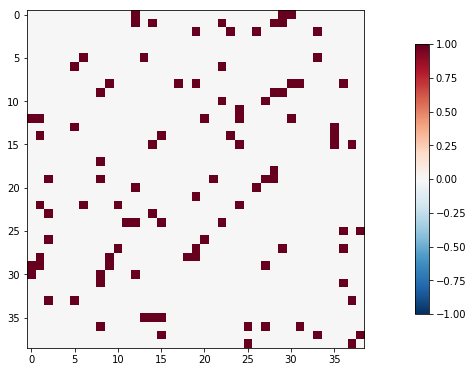

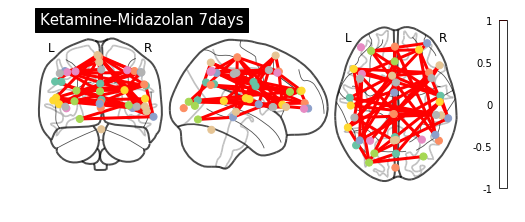

In [37]:
# look at the specific nodes that are components
print(adj)
plotting.plot_matrix(adj, colorbar=True,
                     vmax=1, vmin=-1)

plotting.plot_connectome(adj, coords,
                         edge_threshold="99%", colorbar=True, title = "Ketamine-Midazolan 7days")


In [40]:
view_all = plotting.view_connectome(adj, coords, threshold='98%')
#viewb
view_all

TypeError: view_connectome() got an unexpected keyword argument 'colorbar'